# PyTorch Workflow

In [2]:
what_were_covering = {1: "data (prepare & load)",
            2: "build model",
            3: "fitting the model to data (training)",
            4: "making predictions & evaluating the model (inference)",
            5: "saving & loading the model",
            6: "putting it together"}

what_were_covering

{1: 'data (prepare & load)',
 2: 'build model',
 3: 'fitting the model to data (training)',
 4: 'making predictions & evaluating the model (inference)',
 5: 'saving & loading the model',
 6: 'putting it together'}

In [3]:
import torch
from torch import nn # nn conatins all of PyTorch's "building blocks" for neural networks
import matplotlib.pyplot as plt

# Check PyTorch version
torch.__version__

'2.7.0+cu128'

## 1. Data (preparing & loading)

Data can be almost anything in machine learning.
* Excel spreadsheet
* Videos
* Audio
* Text
* etc ...

Machine learning is a game of two parts:
1. Get data into a numerical representation.
2. Build a model to learn patterns in that numerical representation.

To showcase this, create some *known* data using the linear regression formula to create a straight line with *known* **parameters**.
* `Y = a + bX`, or `dependent (y) = intercept (bias) + slope (weight)*explanatory` 


In [10]:
# Create *known* parameters

weight = 0.7 # b or "slope" of the line
bias = 0.3 # a or "intercept" of the line

# Create data
start = 0
end = 1
step = 0.02
X = torch.arange(start, end, step).unsqueeze(dim=1) # unsqueeze adds a dimension to the tensor
y = bias + weight * X # y = a + bX

X[:10], y[:10] # show first 10 values of X and y

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [8]:
len(X), len(y) # check length of X and y

(50, 50)

### Splitting data into training & test sets (very important!)

Create a training & test set with the data

In [11]:
# Create a training & testing split
train_split = int(0.8 * len(X)) # 80% of data for training
X_train, y_train = X[:train_split], y[:train_split] # first 80% of data for training

X_test, y_test = X[train_split:], y[train_split:] # last 20% of data for testing

len(X_train), len(y_train), len(X_test), len(y_test) # check lengths of training and testing data

(40, 40, 10, 10)

**How could we better visualize our data? Visialize it!**

In [18]:
def plot_predictions(train_data = X_train,
                     train_labels = y_train,
                     # Train on training data & predict on test data
                     test_data = X_test,
                     test_labels = y_test,
                     predictions = None):
    """
    Plots down the training data, test data, & and compares predictions 
    """

    plt.figure(figsize=(10, 7))

    # Plot the training data in orange
    plt.scatter(train_data, train_labels, c="orange", s=4, label="Training data")

    # Plot testing data in purple
    plt.scatter(test_data, test_labels, c="purple", s=4, label="Testing data")

    # Are there predictions?
    if predictions is not None:
        # Plot predictions if they exist
        plt.scatter(test_data, predictions, c="red", s="4", label="Predictions")

    # Show the model's legend
    plt.legend(prop={"size": 14})

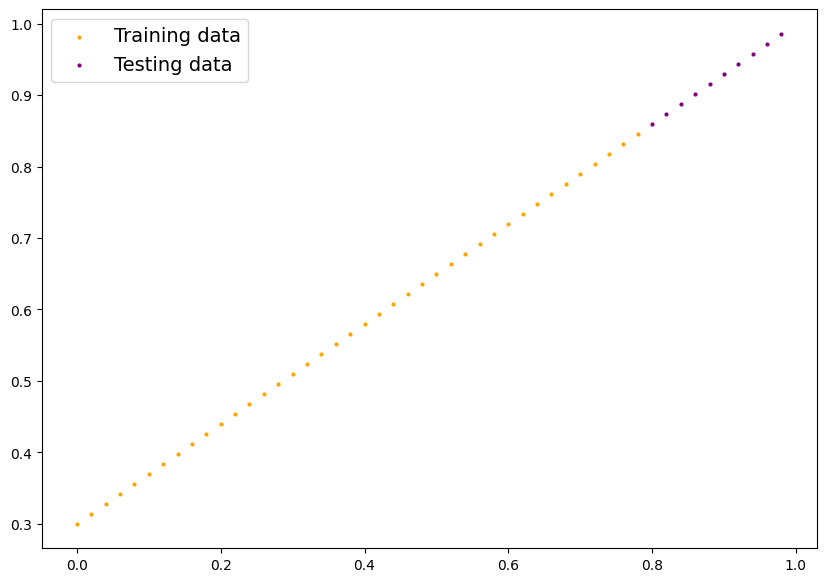

In [19]:
plot_predictions()